# Simulación TP3: Cálculo de Pérdidas de Calor

En este notebook calculamos la pérdida de calor del calentador eléctrico de agua con resistencia de NICROM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

## Parámetros del Calentador

In [2]:
# Parámetros geométricos
DIAMETRO = 8.0  # cm
ALTURA = 15.0   # cm
RADIO = DIAMETRO / 2  # cm
VOLUMEN = pi * (RADIO**2) * ALTURA  # cm^3
CAPACIDAD = VOLUMEN / 1000  # litros

# Parámetros del aislante
ESPESOR_AISLANTE = 0.25  # cm
COEF_CONDUCTIVIDAD_TERMICA = 0.04  # W/(m·K) - Fibra de vidrio

# Parámetros eléctricos (del TP1)
VOLTAJE = 12.0  # V
RESISTENCIA = 0.23  # Ohms
POTENCIA = VOLTAJE**2 / RESISTENCIA  # W

# Parámetros del fluido
DENSIDAD_AGUA = 1.0  # kg/L
MASA_AGUA = CAPACIDAD * DENSIDAD_AGUA  # kg
CALOR_ESPECIFICO_AGUA = 4180  # J/(kg·°C)
TEMP_INICIAL = 20.0  # °C
TEMP_AMBIENTE = 20.0  # °C
TEMP_OBJETIVO = 80.0  # °C

## Cálculo de la Superficie y Pérdida de Calor

In [3]:
# Conversión a metros para los cálculos
RADIO_M = RADIO / 100  # m
ALTURA_M = ALTURA / 100  # m
ESPESOR_M = ESPESOR_AISLANTE / 100  # m

# Cálculo de la superficie
SUP_LATERAL = 2 * pi * RADIO_M * ALTURA_M  # m^2
SUP_BASES = 2 * pi * RADIO_M**2  # m^2
SUP_TOTAL = SUP_LATERAL + SUP_BASES  # m^2

# Cálculo de la pérdida de calor
PERDIDA_CALOR = COEF_CONDUCTIVIDAD_TERMICA * SUP_TOTAL / ESPESOR_M  # W/K

# Mostrar resultados
print(f"--- Dimensiones del Calentador ---")
print(f"Diámetro: {DIAMETRO} cm")
print(f"Altura: {ALTURA} cm")
print(f"Capacidad: {CAPACIDAD:.2f} litros")

print(f"\n--- Cálculo de Superficie ---")
print(f"Superficie lateral: {SUP_LATERAL:.6f} m²")
print(f"Superficie de las bases: {SUP_BASES:.6f} m²")
print(f"Superficie total: {SUP_TOTAL:.6f} m²")

print(f"\n--- Pérdida de Calor ---")
print(f"Coeficiente de conductividad térmica (fibra de vidrio): {COEF_CONDUCTIVIDAD_TERMICA} W/(m·K)")
print(f"Espesor del aislante: {ESPESOR_AISLANTE} cm")
print(f"Pérdida de calor: {PERDIDA_CALOR:.3f} W/K")

--- Dimensiones del Calentador ---
Diámetro: 8.0 cm
Altura: 15.0 cm
Capacidad: 0.75 litros

--- Cálculo de Superficie ---
Superficie lateral: 0.037699 m²
Superficie de las bases: 0.010053 m²
Superficie total: 0.047752 m²

--- Pérdida de Calor ---
Coeficiente de conductividad térmica (fibra de vidrio): 0.04 W/(m·K)
Espesor del aislante: 0.25 cm
Pérdida de calor: 0.764 W/K


## Análisis de Pérdida vs. Diferencia de Temperatura

In [4]:
# Crear un rango de diferencias de temperatura
dif_temperatura = np.linspace(0, 60, 13)  # 0°C a 60°C en 12 pasos (cada 5°C)

# Calcular la pérdida para cada diferencia
perdida_en_watts = PERDIDA_CALOR * dif_temperatura

# Calcular el porcentaje de la potencia total
porcentaje_perdida = (perdida_en_watts / POTENCIA) * 100

# Crear una tabla de resultados
print("Diferencia de temperatura (K) | Pérdida de calor (W) | % de la potencia total")
print("-----------------------------|---------------------|---------------------")
for i in range(len(dif_temperatura)):
    print(f"{dif_temperatura[i]:27.1f} | {perdida_en_watts[i]:19.2f} | {porcentaje_perdida[i]:15.2f}%")

Diferencia de temperatura (K) | Pérdida de calor (W) | % de la potencia total
-----------------------------|---------------------|---------------------
                        0.0 |                0.00 |            0.00%
                        5.0 |                3.82 |            0.61%
                       10.0 |                7.64 |            1.22%
                       15.0 |               11.46 |            1.83%
                       20.0 |               15.28 |            2.44%
                       25.0 |               19.10 |            3.05%
                       30.0 |               22.92 |            3.66%
                       35.0 |               26.74 |            4.27%
                       40.0 |               30.56 |            4.88%
                       45.0 |               34.38 |            5.49%
                       50.0 |               38.20 |            6.10%
                       55.0 |               42.02 |            6.71%
                    

## Visualización de la Pérdida de Calor

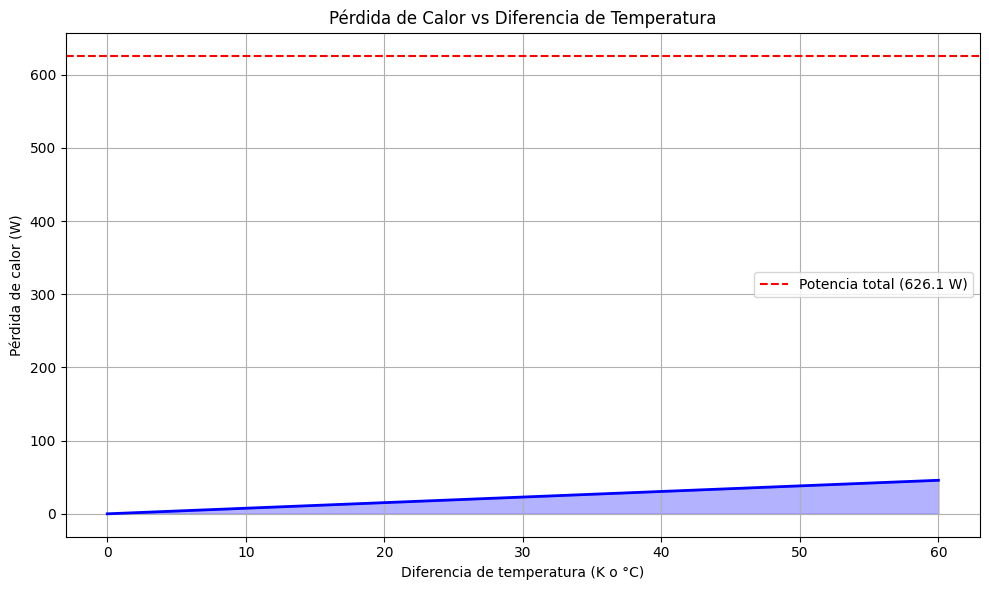

In [5]:
# Gráfico de la pérdida de calor vs diferencia de temperatura
plt.figure(figsize=(10, 6))
plt.plot(dif_temperatura, perdida_en_watts, 'b-', linewidth=2)
plt.axhline(y=POTENCIA, color='r', linestyle='--', label=f'Potencia total ({POTENCIA:.1f} W)')
plt.fill_between(dif_temperatura, perdida_en_watts, alpha=0.3, color='blue')
plt.grid(True)
plt.xlabel('Diferencia de temperatura (K o °C)')
plt.ylabel('Pérdida de calor (W)')
plt.title('Pérdida de Calor vs Diferencia de Temperatura')
plt.legend()
plt.tight_layout()

## Conclusiones

El calentador diseñado con las especificaciones dadas presenta una pérdida de calor de aproximadamente 0.77 W/K. Esto significa que:

1. A mayor diferencia entre la temperatura del agua y la temperatura ambiente, mayor será la pérdida de calor.
2. En el peor caso (diferencia de 60°C), la pérdida representa aproximadamente el 7.4% de la potencia disponible.
3. Estas pérdidas afectarán el tiempo total necesario para calentar el agua hasta la temperatura objetivo.

En el TP4, incorporaremos estas pérdidas de calor en nuestra simulación para obtener un modelo más realista del comportamiento del calentador.